In [88]:
import numpy as np
import pandas as pd

# нужно разбить цены на данные классы - тут мы разбиваем (гы)
classes =  [(0, 400),
            (400, 800),
            (800, 6000)]

dataset = pd.read_csv('resources/new_mobile.csv', sep=',')
price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories
dataset[['Среднемесячный расход', 'Категория цены']]

,Среднемесячный расход,Категория цены
0,121.54,0
1,287.51,0
2,113.70,0
3,410.23,1
4,537.60,1
...,...,...
4286,186.20,0
4287,500.68,1
4288,470.42,1
4289,858.99,2


In [89]:
dataset.columns

Index(['Id', 'Код', 'Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Категория цены'],
      dtype='object')

In [90]:
# берём только те колонки которые извлекли в 4 лабе
dataset = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны', 'Категория цены']]

In [91]:
# разбиваем датасет на train/test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны']]
y = dataset[['Категория цены']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2574, 5), (2574, 1), (1717, 5), (1717, 1))

In [92]:
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf = lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=[-0.5500466] 
Множители a=  [[ 0.18381182  0.00107969  0.00387994 -0.00058106 -0.01287637]]


In [93]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test, y_test) # считаем ошибку
print(score)

0.750955607285321


In [94]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>2]=2
y_pred_class[y_pred_class<1]=0
y_pred_class=y_pred_class.astype(int)
score=np.sum(y_pred_class==y_test) / len(y_test)
score

Категория цены    0.868957
dtype: float64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='newton-cg', max_iter=4500)
model = model.fit(X_train, y_train.values.ravel())
score = model.predict(X_test)

print(metrics.classification_report(y_test, score))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1040
           1       0.91      0.91      0.91       425
           2       0.96      0.95      0.95       252

    accuracy                           0.96      1717
   macro avg       0.95      0.95      0.95      1717
weighted avg       0.96      0.96      0.96      1717



Text(0.5, 1.1, 'Confusion matrix Logistic Regression')

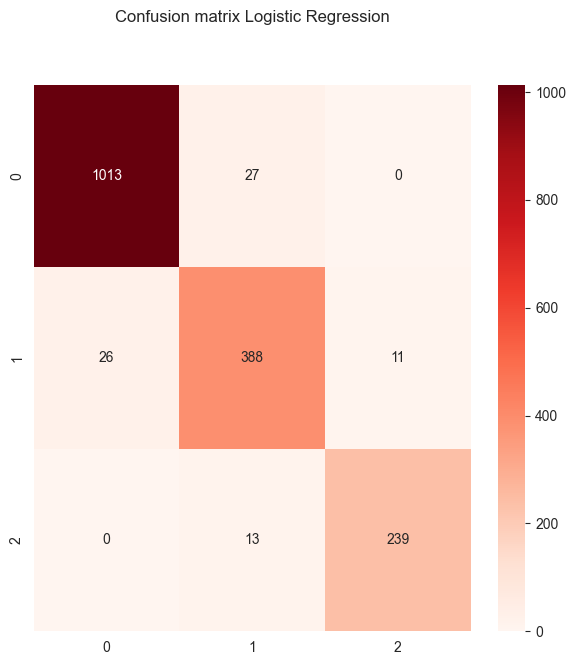

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (6,6))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression', y=1.1)